This notebook is a brief introduction to Anscombe's Quartet, a group of 4 datasets that show how simple descriptive statistics can be deceptive! I have named Anscombe's four datasets 'noisy', 'poly', 'outlier', and 'hmm'... Each dataset has eleven data points. Run this cell to get the summary statistics of these four famous datasets, including their means, correlations, lines of best fit, and more!

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from tabulate import tabulate

x_noisy = np.array([10.0, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_noisy = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x_poly = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_poly = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x_outlier = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_outlier = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x_hmm = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y_hmm = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

m = np.concatenate((x_noisy, y_noisy.reshape(-1,1), x_poly, y_poly.reshape(-1,1), x_outlier, y_outlier.reshape(-1,1),
                    x_hmm, y_hmm.reshape(-1,1)), axis = 1)
headers = ["x_noisy", "y_noisy", "x_poly", "y_poly", "x_outlier", "y_outlier", "x_hmm", "y_hmm"]
table = tabulate(m, headers, tablefmt="fancy_grid")
print(table)

lreg = LinearRegression()
lreg1 = LinearRegression()
lreg2 = LinearRegression()
lreg3 = LinearRegression()

lreg.fit(x_noisy, y_noisy)
lreg1.fit(x_poly, y_poly)
lreg2.fit(x_outlier, y_outlier)
lreg3.fit(x_hmm, y_hmm)

print('Mean of x values \nnoisy:', x_noisy.mean(), '\npoly:', x_poly.mean(), 
      '\noutlier:', x_outlier.mean(), '\nhmm:', x_outlier.mean(), '\n')

print('Variance of x values \nnoisy:', np.var(x_noisy),'\npoly:', np.var(x_poly),
      '\noutlier:', np.var(x_outlier), '\nhmm:', np.var(x_hmm), '\n')

print('Mean of y values \nnoisy:', "%.2f" % y_noisy.mean(), '\npoly: ', "%.2f" % y_poly.mean(), 
      '\noutlier: ', "%.2f" % y_outlier.mean(), '\nhmm: ', "%.2f" % y_outlier.mean(), '\n')

print('Variance of y values \nnoisy:', "%.2f" % np.var(y_noisy),'\npoly:', "%.2f" % np.var(y_poly),
      '\noutlier:', "%.2f" % np.var(y_outlier), '\nhmm:', "%.2f" % np.var(y_hmm), '\n')

print('Correlation \nnoisy:', "%.2f" % np.corrcoef(x_noisy.reshape(1,11), y_noisy.reshape(1,11))[1][0],'\npoly:', "%.2f" % np.corrcoef(x_poly.reshape(1,11), y_poly.reshape(1,11))[1][0],
      '\noutlier:', "%.2f" % np.corrcoef(x_outlier.reshape(1,11), y_outlier.reshape(1,11))[1][0], '\nhmm:', "%.2f" % np.corrcoef(x_hmm.reshape(1,11), y_hmm.reshape(1,11))[1][0], '\n')

print('Linear Regression Trendline \nnoisy: ', "%.2f" % lreg.coef_, 'x + ', "%.2f" % lreg.intercept_,
      '\npoly: ', "%.2f" % lreg1.coef_, 'x + ', "%.2f" % lreg1.intercept_,
      '\noutlier: ', "%.2f" % lreg2.coef_, 'x + ', "%.2f" % lreg2.intercept_,
      '\nhmm: ', "%.2f" % lreg3.coef_, 'x + ', "%.2f" % lreg3.intercept_, '\n',
      sep = '')

print('R^2 value (Coefficient of Determination) \nnoisy:', "%.2f" % r2_score(y_noisy, lreg.predict(x_noisy)),
      '\npoly:', "%.2f" % r2_score(y_poly, lreg1.predict(x_poly)),
      '\noutlier:', "%.2f" % r2_score(y_outlier, lreg2.predict(x_outlier)),
      '\nhmm:', "%.2f" % r2_score(y_hmm, lreg.predict(x_hmm)),)

╒═══════════╤═══════════╤══════════╤══════════╤═════════════╤═════════════╤═════════╤═════════╕
│   x_noisy │   y_noisy │   x_poly │   y_poly │   x_outlier │   y_outlier │   x_hmm │   y_hmm │
╞═══════════╪═══════════╪══════════╪══════════╪═════════════╪═════════════╪═════════╪═════════╡
│        10 │      8.04 │       10 │     9.14 │          10 │        7.46 │       8 │    6.58 │
├───────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼─────────┼─────────┤
│         8 │      6.95 │        8 │     8.14 │           8 │        6.77 │       8 │    5.76 │
├───────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼─────────┼─────────┤
│        13 │      7.58 │       13 │     8.74 │          13 │       12.74 │       8 │    7.71 │
├───────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼─────────┼─────────┤
│         9 │      8.81 │        9 │     8.77 │           9 │        7.11 │       8 │    8.84 │
├───────────┼───────────┼──────────┼────

As we can see, the four datasets have almost identical summary statistics. That must mean they are very similar... right? Before running the next cell, take a second to envision what the datasets that generated these statistics might look like. Eleven datapoints, all with a trendline of 0.5x + 3, correlation of 0.82, R^2 of 0.67... etc. Try to graph the datasets in your mind, then run the next cell

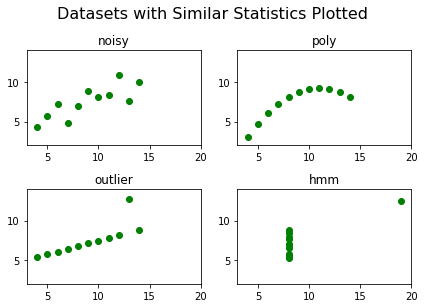

In [0]:
fig = plt.figure()
fig.suptitle('Datasets with Similar Statistics Plotted', fontsize=16, y = 1.06)

plt.subplot(221)
plt.axis((3, 20, 2, 14))
plt.scatter(x_noisy, y_noisy, color = 'g')
plt.title('noisy')

plt.subplot(222)
plt.axis((3, 20, 2, 14))
plt.scatter(x_poly, y_poly, color = 'g')
plt.title('poly')

plt.subplot(223)
plt.axis((3, 20, 2, 14))
plt.scatter(x_outlier, y_outlier, color = 'g')
plt.title('outlier')

plt.subplot(224)
plt.axis((3, 20, 2, 14))
plt.scatter(x_hmm, y_hmm, color = 'g')
plt.title('hmm')

plt.tight_layout()
plt.show()

Wow! Those graphs don't look similar at all! Which of the datasets above do you think demonstrate a linear relationship between x and y? Why do you think this? After all, all four datasets have the exact same R^2 value, indicating the same amount of variance in y that can be explained by a linear function of x. Anscombe's quartet goes to show that even basic summary statistics can be misleading, and sometimes visualization conveys information that summary statistics might miss. Run the cell below to see the graphs above with their trendlines added

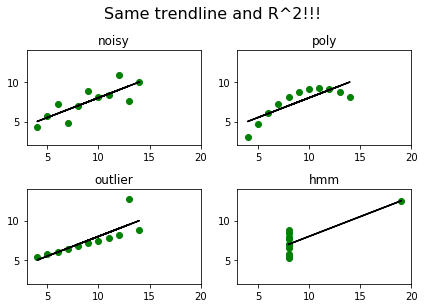

In [0]:
fig = plt.figure()
fig.suptitle('Same trendline and R^2!!!', fontsize=16, y = 1.06)

plt.subplot(221)
plt.axis((3, 20, 2, 14))
plt.plot(x_noisy, lreg.predict(x_noisy), color = 'k')
plt.scatter(x_noisy, y_noisy, color = 'g')
plt.title('noisy')


plt.subplot(222)
plt.axis((3, 20, 2, 14))
plt.plot(x_poly, lreg1.predict(x_poly), color = 'k')
plt.scatter(x_poly, y_poly, color = 'g')
plt.title('poly')

plt.subplot(223)
plt.axis((3, 20, 2, 14))
plt.plot(x_outlier, lreg2.predict(x_outlier), color = 'k')
plt.scatter(x_outlier, y_outlier, color = 'g')
plt.title('outlier')

plt.subplot(224)
plt.axis((3, 20, 2, 14))
plt.plot(x_hmm, lreg3.predict(x_hmm), color = 'k')
plt.scatter(x_hmm, y_hmm, color = 'g')
plt.title('hmm')

plt.tight_layout()
plt.show()

What does it mean to *understand* the datasets above? What other summary statistics might better capture the differences between each dataset? When I first saw the top right dataset plotted, it looked to my eyes that the data could have been generated by a second order polynomial function. Further, it appears that the linear regression trendline is underfitting the poly dataset. To explore this hypothesis, lets perform polynomial regression on the datasets! 

Root Mean Square Error 
noisy: 1.08 
poly:  0.00 
outlier:  1.09 
hmm:  1.12 

R^2 value 
noisy: 0.69 
poly:  1.00 
outlier:  0.68 
hmm:  0.67 



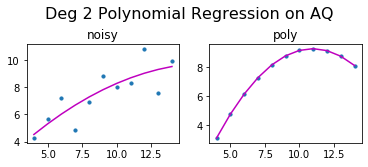

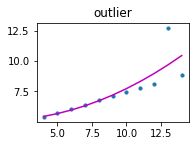

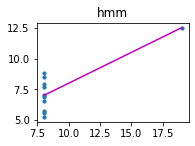

In [0]:
from sklearn.preprocessing import PolynomialFeatures
import operator

polynomial_features= PolynomialFeatures(degree=2)

x_noisy = np.array([10.0, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_noisy = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x_poly = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_poly = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x_outlier = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_outlier = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x_hmm = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y_hmm = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

Px_noisy = polynomial_features.fit_transform(x_noisy)
Px_poly = polynomial_features.fit_transform(x_poly)
Px_outlier = polynomial_features.fit_transform(x_outlier)
Px_hmm = polynomial_features.fit_transform(x_hmm)

lreg.fit(Px_noisy, y_noisy)
lreg1.fit(Px_poly, y_poly)
lreg2.fit(Px_outlier, y_outlier)
lreg3.fit(Px_hmm, y_hmm)

y_noisy_pred = lreg.predict(Px_noisy)
rmse = np.sqrt(mean_squared_error(y_noisy, y_noisy_pred))
r2 = r2_score(y_noisy,y_noisy_pred)

y_poly_pred = lreg1.predict(Px_poly)
rmse1 = np.sqrt(mean_squared_error(y_poly, y_poly_pred))
r21 = r2_score(y_poly ,y_poly_pred)

y_outlier_pred = lreg2.predict(Px_outlier)
rmse2 = np.sqrt(mean_squared_error(y_outlier, y_outlier_pred))
r22 = r2_score(y_outlier ,y_outlier_pred)

y_hmm_pred = lreg3.predict(Px_hmm)
rmse3 = np.sqrt(mean_squared_error(y_hmm, y_hmm_pred))
r23 = r2_score(y_hmm ,y_hmm_pred)

print('Root Mean Square Error \nnoisy:', "%.2f" % rmse, '\npoly: ', "%.2f" % rmse1 ,
      '\noutlier: ', "%.2f" % rmse2, '\nhmm: ', "%.2f" % rmse3, '\n')

print('R^2 value \nnoisy:', "%.2f" % r2, '\npoly: ', "%.2f" % r21 ,
      '\noutlier: ', "%.2f" % r22, '\nhmm: ', "%.2f" % r23, '\n')

fig = plt.figure()
fig.suptitle('Deg 2 Polynomial Regression on AQ', fontsize=16, y = 1.01)

plt.subplot(221)
plt.scatter(x_noisy, y_noisy, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_noisy,y_noisy_pred), key=sort_axis)
x_noisy, y_noisy_pred = zip(*sorted_zip)
plt.plot(x_noisy, y_noisy_pred, color='m')
plt.title('noisy')

plt.subplot(222)
plt.scatter(x_poly, y_poly, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_poly, y_poly_pred), key=sort_axis)
x_poly, y_poly_pred = zip(*sorted_zip)
plt.plot(x_poly, y_poly_pred, color='m')
plt.title('poly')
plt.show()

plt.subplot(223)
plt.scatter(x_outlier, y_outlier, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_outlier, y_outlier_pred), key=sort_axis)
x_outlier, y_outlier_pred = zip(*sorted_zip)
plt.plot(x_outlier, y_outlier_pred, color='m')
plt.title('outlier')
plt.show()

plt.subplot(224)
plt.scatter(x_hmm, y_hmm, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_hmm, y_hmm_pred), key=sort_axis)
x_hmm, y_hmm_pred = zip(*sorted_zip)
plt.plot(x_hmm, y_hmm_pred, color='m')
plt.title('hmm')

plt.show()

As we guessed, a second degree polynomial fits the 'poly' dataset very well, both visually, and as evidenced by its R^2 and RMSE values. The other datasets do not benefit as much from the increased model capacity. Visually, the poly dataset 'looked' like it was generated by a second degree polynomial, prompting this experiment. **However** keep in mind that *all* of the datasets besides 'hmm' can be fitted exactly by a 10th degree function (since they each have 11 datapoints with a single y value for every x). This polynomial is called the Lagrange polynomial. Do these datasets *look like* they were generated by a 10th degree polynomial? How do you know? As a final experiment, lets use polynomial regression again, this time including terms up to the 10th degree

Root Mean Square Error 
noisy: 0.06 
poly:  0.00 
outlier:  0.02 
hmm:  1.12 

R^2 value 
noisy: 1.00 
poly:  1.00 
outlier:  1.00 
hmm:  0.67 



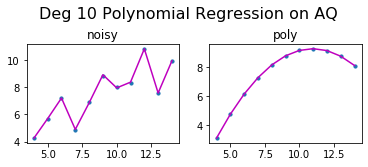

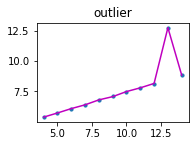

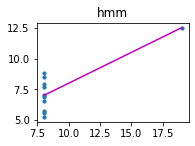

In [0]:
polynomial_features= PolynomialFeatures(degree=10)

x_noisy = np.array([10.0, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_noisy = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x_poly = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_poly = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x_outlier = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_outlier = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x_hmm = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y_hmm = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

Px_noisy = polynomial_features.fit_transform(x_noisy)
Px_poly = polynomial_features.fit_transform(x_poly)
Px_outlier = polynomial_features.fit_transform(x_outlier)
Px_hmm = polynomial_features.fit_transform(x_hmm)

lreg.fit(Px_noisy, y_noisy)
lreg1.fit(Px_poly, y_poly)
lreg2.fit(Px_outlier, y_outlier)
lreg3.fit(Px_hmm, y_hmm)

y_noisy_pred = lreg.predict(Px_noisy)
rmse = np.sqrt(mean_squared_error(y_noisy, y_noisy_pred))
r2 = r2_score(y_noisy,y_noisy_pred)

y_poly_pred = lreg1.predict(Px_poly)
rmse1 = np.sqrt(mean_squared_error(y_poly, y_poly_pred))
r21 = r2_score(y_poly ,y_poly_pred)

y_outlier_pred = lreg2.predict(Px_outlier)
rmse2 = np.sqrt(mean_squared_error(y_outlier, y_outlier_pred))
r22 = r2_score(y_outlier ,y_outlier_pred)

y_hmm_pred = lreg3.predict(Px_hmm)
rmse3 = np.sqrt(mean_squared_error(y_hmm, y_hmm_pred))
r23 = r2_score(y_hmm ,y_hmm_pred)

print('Root Mean Square Error \nnoisy:', "%.2f" % rmse, '\npoly: ', "%.2f" % rmse1 ,
      '\noutlier: ', "%.2f" % rmse2, '\nhmm: ', "%.2f" % rmse3, '\n')

print('R^2 value \nnoisy:', "%.2f" % r2, '\npoly: ', "%.2f" % r21 ,
      '\noutlier: ', "%.2f" % r22, '\nhmm: ', "%.2f" % r23, '\n')

fig = plt.figure()
fig.suptitle('Deg 10 Polynomial Regression on AQ', fontsize=16, y = 1.01)

plt.subplot(221)
plt.scatter(x_noisy, y_noisy, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_noisy,y_noisy_pred), key=sort_axis)
x_noisy, y_noisy_pred = zip(*sorted_zip)
plt.plot(x_noisy, y_noisy_pred, color='m')
plt.title('noisy')

plt.subplot(222)
plt.scatter(x_poly, y_poly, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_poly, y_poly_pred), key=sort_axis)
x_poly, y_poly_pred = zip(*sorted_zip)
plt.plot(x_poly, y_poly_pred, color='m')
plt.title('poly')
plt.show()

plt.subplot(223)
plt.scatter(x_outlier, y_outlier, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_outlier, y_outlier_pred), key=sort_axis)
x_outlier, y_outlier_pred = zip(*sorted_zip)
plt.plot(x_outlier, y_outlier_pred, color='m')
plt.title('outlier')
plt.show()

plt.subplot(224)
plt.scatter(x_hmm, y_hmm, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_hmm, y_hmm_pred), key=sort_axis)
x_hmm, y_hmm_pred = zip(*sorted_zip)
plt.plot(x_hmm, y_hmm_pred, color='m')
plt.title('hmm')

plt.show()

The plots aren't so good, but you get the point. We could calculate an exact polynomial that fits 'noisy', 'poly', and 'outlier' with zero error. With all this in mind, what measures that we have calculated so far best capture an *understanding* of the datasets? If we had more data, how would this change? Thanks for reading, and I hope you'll keep this in mind the next time you are trying to turn data into understanding/intelligence!